In [90]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [91]:
all_iters_info = {}
for name in os.listdir('pickles/all_iterative_info/temp_0.6_topn_0.6/'):
    if '.pickle' in name:
        with open(f'pickles/all_iterative_info/temp_0.6_topn_0.6/{name}', 'rb') as file:
            pickle_data = pickle.load(file)
    tmp = name.split('.')[0]
    patient_num, note_num = int(tmp.split('_')[1]), int(tmp.split('_')[3])
    if patient_num not in all_iters_info:
        all_iters_info[patient_num] = [pickle_data]
    else:
        all_iters_info[patient_num].append(pickle_data)
print('len(all_iters_info):', len(os.listdir('pickles/all_iterative_info/temp_0.6_topn_0.6/')))

len(all_iters_info): 10


In [124]:
for each in all_iters_info[1][8]['all_llama_prompts']:
    print(each)
    print('=' * 50)

 Your task is to function as a clinical analyst, reviewing a series of Electronic Health Records to identify specific toxicities. For each case, you will receive a target toxicity and a progress note containing a patient's health records. Please follow these guidelines:
    - Return "1" if the patient is clearly diagnosed with the specified target symptom.
    - Return "-1" if the records conclusively indicate that the patient does not have the target symptom.
    - Return "0" if there is insufficient data or if the information does not conclusively confirm or deny the presence of the target symptom.
    Ensure your responses are limited to -1, 0, or 1 only.
You are a clinical analyst screening Electronic Health Records for the presence of specific toxicities. For each given case, analyze the provided progress note along with a target toxicity. In your response, maintain the following guidelines: \n- Indicate '1' if clear evidence diagnoses the patient with the given target toxicity. \

In [92]:
all_acc, all_prec_pres, all_prec_neg, all_prec_pn = [], [], [], []
for patient in all_iters_info:
    for note in all_iters_info[patient]:
        all_acc.append(note['all_accs'])
        all_prec_pres.append(note['all_precs_pres'])
        all_prec_neg.append(note['all_precs_neg'])
        all_prec_pn.append(note['all_prec_pn'])
len(all_acc), len(all_prec_pres), len(all_prec_neg), len(all_prec_pn)

(10, 10, 10, 10)

In [93]:
all_iters_info[1][0]['all_prec_pn']

[0.125, 0.0, 0.0, 0.125, 0.25, 0.16666666666666666, 0, 0.0, 0.0, 0]

In [94]:
improved_count_acc, improved_prec_pres, improved_prec_neg, improved_prec_pn = 0, 0, 0, 0
for sims in all_acc:
    if sims[-1] > sims[0]:
        improved_count_acc += 1
for sims in all_prec_pres:
    if sims[-1] > sims[0]:
        improved_prec_pres += 1
for sims in all_prec_neg:
    if sims[-1] > sims[0]:
        improved_prec_neg += 1
for sims in all_prec_pn:
    if sims[-1] > sims[0]:
        improved_prec_pn += 1
print('ACC Last to first improvement:', improved_count_acc / len(all_acc))
print('PREC Pres Last to first improvement:', improved_prec_pres / len(all_prec_pres))
print('PREC Neg Last to first improvement:', improved_prec_neg / len(all_prec_neg))
print('PREC PN Last to first improvement:', improved_prec_pn / len(all_prec_pn))

ACC Last to first improvement: 0.8
PREC Pres Last to first improvement: 0.0
PREC Neg Last to first improvement: 0.0
PREC PN Last to first improvement: 0.0


In [95]:
improved_count_acc = 0
for sims in all_acc:
    if max(sims) > sims[0]:
        improved_count_acc += 1
improved_prec_pres = 0
for sims in all_prec_pres:
    if max(sims) > sims[0]:
        improved_prec_pres += 1
improved_prec_neg = 0
for sims in all_prec_neg:
    if max(sims) > sims[0]:
        improved_prec_neg += 1
improved_prec_pn = 0
for sims in all_prec_pn:
    if max(sims) > sims[0]:
        improved_prec_pn += 1
print('ACC General improvement:', improved_count_acc / len(all_acc))
print('PREC Pres General improvement:', improved_prec_pres / len(all_prec_pres))
print('PREC Neg General improvement:', improved_prec_neg / len(all_prec_neg))
print('PREC PN General improvement:', improved_prec_pn / len(all_prec_pn))

ACC General improvement: 1.0
PREC Pres General improvement: 0.1
PREC Neg General improvement: 0.0
PREC PN General improvement: 0.3


In [96]:
all_acc_progs = []
for sim in all_acc:
    prog = 0
    for i in range(1, len(sim)):
        prog = sim[i] - sim[i-1]
    all_acc_progs.append(prog)
pos_acc_prog_count = 0
for prog in all_acc_progs:
    if prog > 0:
        pos_acc_prog_count += 1

all_prec_pres_progs = []
for sim in all_prec_pres:
    prog = 0
    for i in range(1, len(sim)):
        prog = sim[i] - sim[i-1]
    all_prec_pres_progs.append(prog)
pos_prec_pres_prog_count = 0
for prog in all_prec_pres_progs:
    if prog > 0:
        pos_prec_pres_prog_count += 1

all_prec_neg_progs = []
for sim in all_prec_neg:
    prog = 0
    for i in range(1, len(sim)):
        prog = sim[i] - sim[i-1]
    all_prec_neg_progs.append(prog)
pos_prec_neg_prog_count = 0
for prog in all_prec_neg_progs:
    if prog > 0:
        pos_prec_neg_prog_count += 1

all_prec_pn_progs = []
for sim in all_prec_pn:
    prog = 0
    for i in range(1, len(sim)):
        prog = sim[i] - sim[i-1]
    all_prec_pn_progs.append(prog)
pos_prec_pn_prog_count = 0
for prog in all_prec_pn_progs:
    if prog > 0:
        pos_prec_pn_prog_count += 1

print('ACC Positive progression percentage:', pos_acc_prog_count / len(all_acc_progs)) 
print('PREC Pres Positive progression percentage:', pos_prec_pres_prog_count / len(all_prec_pres_progs))
print('PREC Neg Positive progression percentage:', pos_prec_neg_prog_count / len(all_prec_neg_progs))
print('PREC PN Positive progression percentage:', pos_prec_pn_prog_count / len(all_prec_pn_progs))

ACC Positive progression percentage: 0.3
PREC Pres Positive progression percentage: 0.0
PREC Neg Positive progression percentage: 0.0
PREC PN Positive progression percentage: 0.0


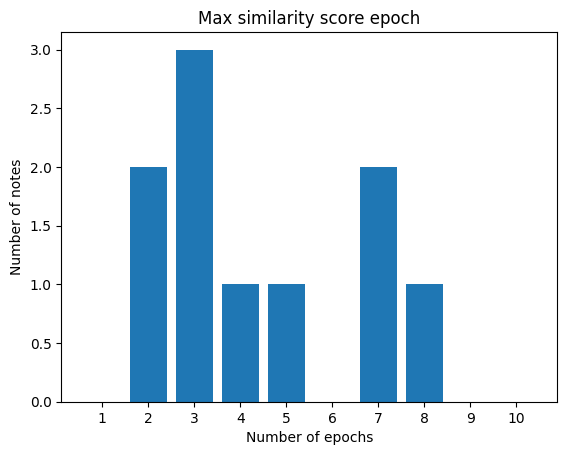

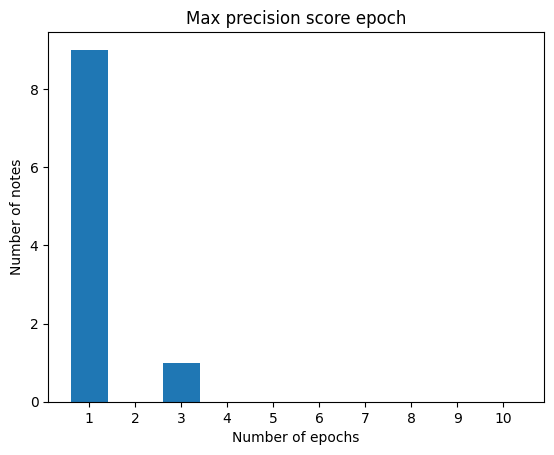

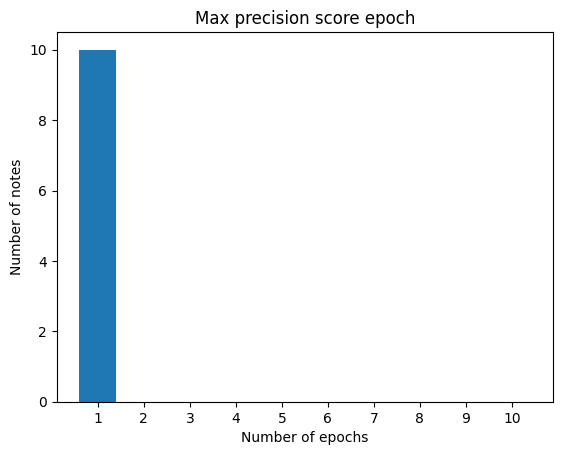

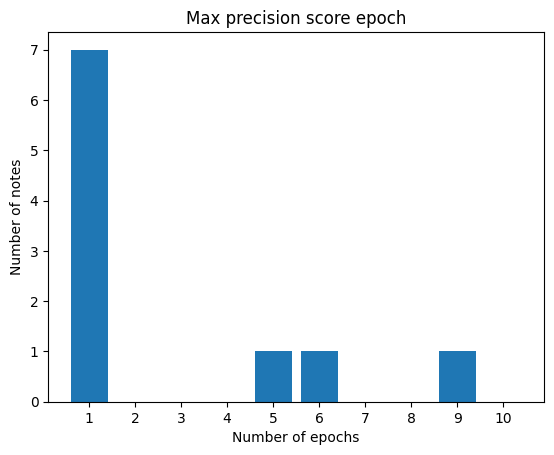

In [97]:
all_max_acc, all_max_prec_pres, all_max_prec_neg, all_max_prec_pn = [], [], [], []
for sim in all_acc:
    all_max_acc.append(np.argmax(sim) + 1)
for sim in all_prec_pres:
    all_max_prec_pres.append(np.argmax(sim) + 1)
for sim in all_prec_neg:
    all_max_prec_neg.append(np.argmax(sim) + 1)
for sim in all_prec_pn:
    all_max_prec_pn.append(np.argmax(sim) + 1)

# create a histogram of the all_max_sims
plt.hist(all_max_acc, bins=np.arange(1, 12) - 0.5, rwidth=0.8)
plt.xlabel('Number of epochs')
plt.ylabel('Number of notes')
plt.xticks(np.arange(1, 11, 1))
plt.title('Max similarity score epoch')
plt.show()

plt.hist(all_max_prec_pres, bins=np.arange(1, 12) - 0.5, rwidth=0.8)
plt.xlabel('Number of epochs')
plt.ylabel('Number of notes')
plt.xticks(np.arange(1, 11, 1))
plt.title('Max precision score epoch')
plt.show()

plt.hist(all_max_prec_neg, bins=np.arange(1, 12) - 0.5, rwidth=0.8)
plt.xlabel('Number of epochs')
plt.ylabel('Number of notes')
plt.xticks(np.arange(1, 11, 1))
plt.title('Max precision score epoch')
plt.show()

plt.hist(all_max_prec_pn, bins=np.arange(1, 12) - 0.5, rwidth=0.8)
plt.xlabel('Number of epochs')
plt.ylabel('Number of notes')
plt.xticks(np.arange(1, 11, 1))
plt.title('Max precision score epoch')
plt.show()

In [98]:
all_acc_np = np.array(all_acc)
avg_acc = np.mean(all_acc_np, axis=0)
std_acc = np.std(all_acc_np, axis=0)
print('all_acc_np.shape:', all_acc_np.shape)

all_prec_pres_np = np.array(all_prec_pres)
avg_prec_pres = np.mean(all_prec_pres_np, axis=0)
std_prec_pres = np.std(all_prec_pres_np, axis=0)
print('all_prec_pres_np.shape:', all_prec_pres_np.shape)

all_prec_neg_np = np.array(all_prec_neg)
avg_prec_neg = np.mean(all_prec_neg_np, axis=0)
std_prec_neg = np.std(all_prec_neg_np, axis=0)
print('all_prec_neg_np.shape:', all_prec_neg_np.shape)

all_prec_pn_np = np.array(all_prec_pn)
avg_prec_pn = np.mean(all_prec_pn_np, axis=0)
std_prec_pn = np.std(all_prec_pn_np, axis=0)
print('all_prec_pn_np.shape:', all_prec_pn_np.shape)

all_acc_np.shape: (10, 10)
all_prec_pres_np.shape: (10, 10)
all_prec_neg_np.shape: (10, 10)
all_prec_pn_np.shape: (10, 10)


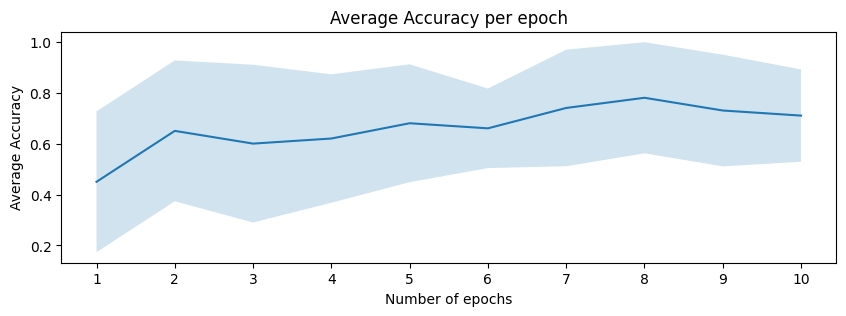

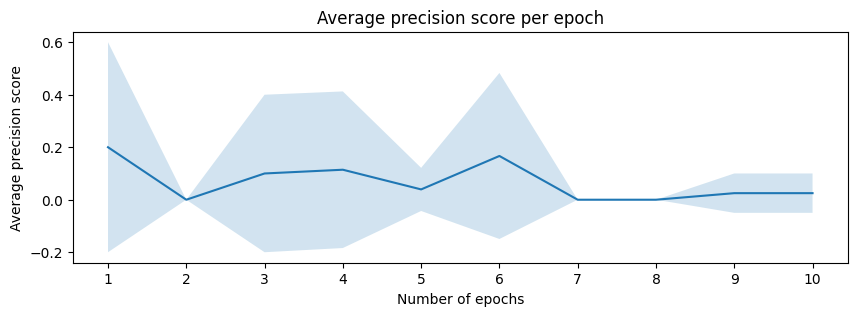

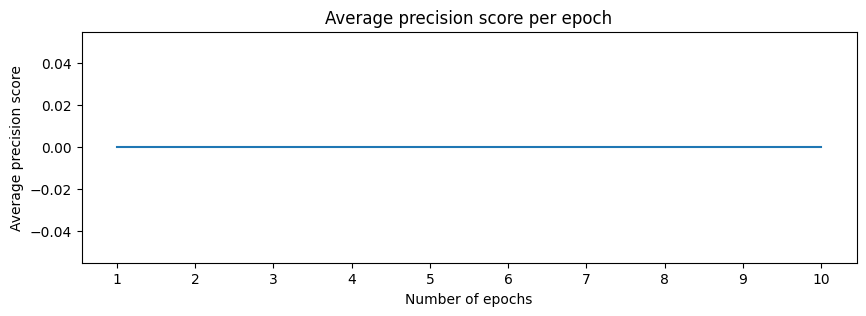

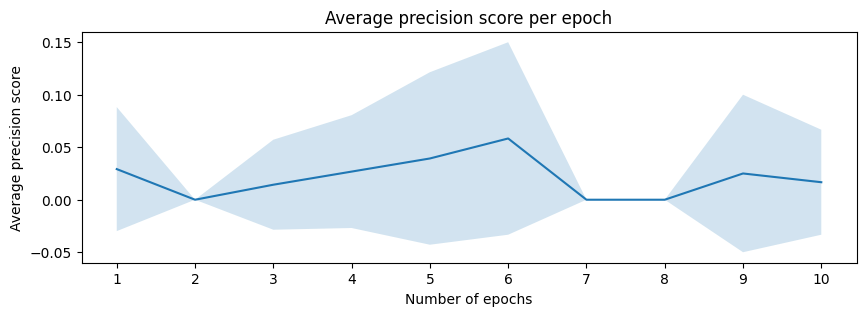

In [99]:
#plot the average and std similarity score per epoch
plt.plot(np.arange(1, 11), avg_acc)
plt.fill_between(np.arange(1, 11), avg_acc - std_acc, avg_acc + std_acc, alpha=0.2)
plt.xlabel('Number of epochs')
plt.ylabel('Average Accuracy')
plt.xticks(np.arange(1, 11, 1))
plt.title('Average Accuracy per epoch')
plt.gcf().set_size_inches(10, 3)
plt.show()

plt.plot(np.arange(1, 11), avg_prec_pres)
plt.fill_between(np.arange(1, 11), avg_prec_pres - std_prec_pres, avg_prec_pres + std_prec_pres, alpha=0.2)
plt.xlabel('Number of epochs')
plt.ylabel('Average precision score')
plt.xticks(np.arange(1, 11, 1))
plt.title('Average precision score per epoch')
plt.gcf().set_size_inches(10, 3)
plt.show()

plt.plot(np.arange(1, 11), avg_prec_neg)
plt.fill_between(np.arange(1, 11), avg_prec_neg - std_prec_neg, avg_prec_neg + std_prec_neg, alpha=0.2)
plt.xlabel('Number of epochs')
plt.ylabel('Average precision score')
plt.xticks(np.arange(1, 11, 1))
plt.title('Average precision score per epoch')
plt.gcf().set_size_inches(10, 3)
plt.show()

plt.plot(np.arange(1, 11), avg_prec_pn)
plt.fill_between(np.arange(1, 11), avg_prec_pn - std_prec_pn, avg_prec_pn + std_prec_pn, alpha=0.2)
plt.xlabel('Number of epochs')
plt.ylabel('Average precision score')
plt.xticks(np.arange(1, 11, 1))
plt.title('Average precision score per epoch')
plt.gcf().set_size_inches(10, 3)
plt.show()

In [100]:
print(avg_acc)
print(std_acc)

[0.45 0.65 0.6  0.62 0.68 0.66 0.74 0.78 0.73 0.71]
[0.27658633 0.27658633 0.30983867 0.2521904  0.23151674 0.15620499
 0.22891046 0.21817424 0.21931712 0.18138357]


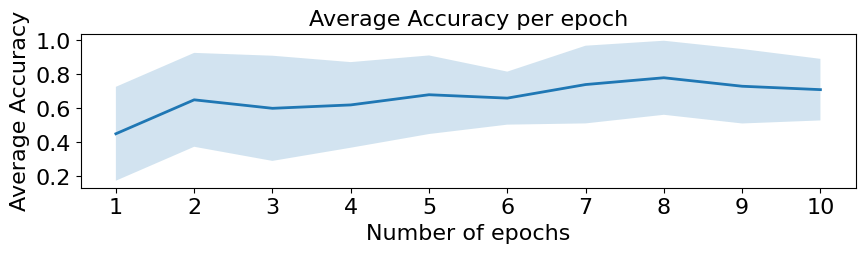

In [109]:
#plot the average and std similarity score per epoch
plt.plot(np.arange(1, 11), avg_acc, linewidth=2)  # Enlarge line width
plt.fill_between(np.arange(1, 11), avg_acc - std_acc, avg_acc + std_acc, alpha=0.2)
plt.xlabel('Number of epochs', fontsize=16)  # Enlarge font size
plt.ylabel('Average Accuracy', fontsize=16)  # Enlarge font size
plt.xticks(np.arange(1, 11, 1), fontsize=16)  # Enlarge tick label font size
plt.yticks(fontsize=16)  # Enlarge tick label font size
plt.title('Average Accuracy per epoch', fontsize=16)  # Enlarge font size
plt.gcf().set_size_inches(10, 2)  # Set the figure size
plt.show()

Reps

In [58]:
all_iters_info = {}
for test_folder in os.listdir('pickles/rep_matrix_eval/'):
    all_iters_info[test_folder] = {}
    for name in os.listdir(f'pickles/rep_matrix_eval/{test_folder}'):
        if '.pickle' in name:
            with open(f'pickles/rep_matrix_eval/{test_folder}/{name}', 'rb') as file:
                pickle_data = pickle.load(file)
        tmp = name.split('.')[0]
        patient_num, note_num = int(tmp.split('_')[1]), int(tmp.split('_')[3])
        if patient_num not in all_iters_info[test_folder]:
            all_iters_info[test_folder][patient_num] = [pickle_data]
        else:
            all_iters_info[test_folder][patient_num].append(pickle_data)

In [59]:
all_iters_info['temp_0.6_topn_0.6'][1][5]['all_tox_pred_labels']

[[0, 0, 0, 0, 0, 0, 1, 1, -1, 0],
 [1, 0, 0, 0, 0, 0, 1, -1, -1, 1],
 [0, 0, 0, 0, 0, 0, 1, -1, -1, 1]]

In [60]:
def calculate_repeatability_score(note_results):
    total_items = len(note_results[0])
    total_agreement = sum(all(run[i] == note_results[0][i] for run in note_results) 
                          for i in range(total_items))
    repeatability = total_agreement / total_items
    return repeatability

note1_results = [
    [0, 0, 0, 0, 0, 0, 1, 1, -1, 0],
    [1, 0, 0, 0, 0, 0, 1, -1, -1, 1],
    [0, 0, 0, 0, 0, 0, 1, -1, -1, 1]
]

repeatability_score = calculate_repeatability_score(note1_results)
print(f"The repeatability score for the note is: {repeatability_score:.2f}")

The repeatability score for the note is: 0.70


In [61]:
for test_folder in all_iters_info.keys():
    all_reps = []
    all_reps_1_2 = []
    all_reps_2_3 = []
    for patient in [1, 2]:
        for info in all_iters_info[test_folder][patient]:
            all_reps.append(calculate_repeatability_score(info['all_tox_pred_labels']))
            all_reps_1_2.append(calculate_repeatability_score(info['all_tox_pred_labels'][:2]))
            all_reps_2_3.append(calculate_repeatability_score(info['all_tox_pred_labels'][1:]))
    print('Test Folder:', test_folder, 'Mean Repeatability:', np.mean(all_reps))
    print('Test Folder:', test_folder, 'Mean Repeatability 1-2:', np.mean(all_reps_1_2))
    print('Test Folder:', test_folder, 'Mean Repeatability 2-3:', np.mean(all_reps_2_3))

Test Folder: temp_0.6_topn_0.6 Mean Repeatability: 0.6799999999999999
Test Folder: temp_0.6_topn_0.6 Mean Repeatability 1-2: 0.76
Test Folder: temp_0.6_topn_0.6 Mean Repeatability 2-3: 0.8300000000000001


testing with Mixtral

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Hello my name is"
inputs = tokenizer(text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/home/admin/VS Code Projects/HFH/Symptom Extraction/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 1.46k/1.46k [00:00<00:00, 11.5MB/s]
tokenizer.model: 100%|██████████| 493k/493k [00:00<00:00, 4.56MB/s]
tokenizer.json: 100%|██████████| 1.80M/1.80M [00:00<00:00, 5.68MB/s]
special_tokens_map.json: 100%|██████████| 72.0/72.0 [00:00<00:00, 333kB/s]
config.json: 100%|██████████| 720/720 [00:00<00:00, 6.20MB/s]
model.safetensors.index.json: 100%|██████████| 92.7k/92.7k [00:00<00:00, 5.99MB/s]
model-00001-of-00019.safetensors: 100%|██████████| 4.89G/4.89G [14:00<00:00, 5.82MB/s]
model-00002-of-00019.safetensors: 100%|██████████| 4.98G/4.98G [13:10<00:00, 6.30MB/s]
Trying to resume download...











































































Hello my name is Kaitlyn and I am a 20 year old college student. I am currently studying to


deidentification

In [1]:
!pip install bert-deid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 KB 11.0 MB/s eta 0:00:00


In [4]:
import bert_deid

In [7]:
# !export MODEL_DIR="bert_deid_model"
!bert_deid download

Traceback (most recent call last):
  File "/home/admin/VS Code Projects/HFH/Symptom Extraction/venv/bin/bert_deid", line 7, in <module>
    from bert_deid.__main__ import main
  File "/home/admin/VS Code Projects/HFH/Symptom Extraction/venv/lib/python3.10/site-packages/bert_deid/__main__.py", line 7, in <module>
    from bert_deid.model.transformer import Transformer
  File "/home/admin/VS Code Projects/HFH/Symptom Extraction/venv/lib/python3.10/site-packages/bert_deid/model/transformer.py", line 10, in <module>
    from seqeval.metrics import f1_score, precision_score, recall_score
ModuleNotFoundError: No module named 'seqeval'


In [43]:
import os
import pickle

sg_results = {}
output_dir = 'pickles/single_graded/mixtral/'
for result_pkl in os.listdir(output_dir):
    if '.pkl' in result_pkl:
        with open(output_dir + result_pkl, 'rb') as file:
            toxicity = result_pkl.split('.')[0]
            sg_results[toxicity] = pickle.load(file)
print('len(sg_results):', len(sg_results))  

len(sg_results): 12


In [44]:
sg_results.keys()

dict_keys(['Urinary obstruction', 'Proctitis', 'Urgency', 'Stricture', 'Dysuria', 'Erectile Dysfunction', 'Hematuria', 'Fistula', 'Nocturia', 'Urothelial carcinoma', 'Rectal bleeding', 'Cystitis'])

In [45]:
sg_results['Urgency'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [46]:
sg_results['Urgency'][1].keys()

dict_keys(['prompt', 'ground_truth_labels', 'student_labels', 'accuracy', 'precision_for_symptom_presence', 'precision_for_symptom_negation'])

In [47]:
toxicity_acc, toxicity_prec_pos, toxicity_prec_neg = {}, {}, {}
for toxicity in sg_results:
    toxicity_acc[toxicity] = []
    toxicity_prec_pos[toxicity] = []
    toxicity_prec_neg[toxicity] = []
    for patient in sg_results[toxicity]:
        toxicity_acc[toxicity].append(sg_results[toxicity][patient]['accuracy'])
        toxicity_prec_pos[toxicity].append(sg_results[toxicity][patient]['precision_for_symptom_presence'])
        toxicity_prec_neg[toxicity].append(sg_results[toxicity][patient]['precision_for_symptom_negation'])

print('len(toxicity_acc):', len(toxicity_acc))
print('len(toxicity_prec_pos):', len(toxicity_prec_pos))
print('len(toxicity_prec_neg):', len(toxicity_prec_neg))

len(toxicity_acc): 12
len(toxicity_prec_pos): 12
len(toxicity_prec_neg): 12


In [48]:
toxicity_acc['Urgency']

[0.2, 0.35, 0.2, 0.35, 0.35, 0.4, 0.15, 0.1, 0.25, 0.35]

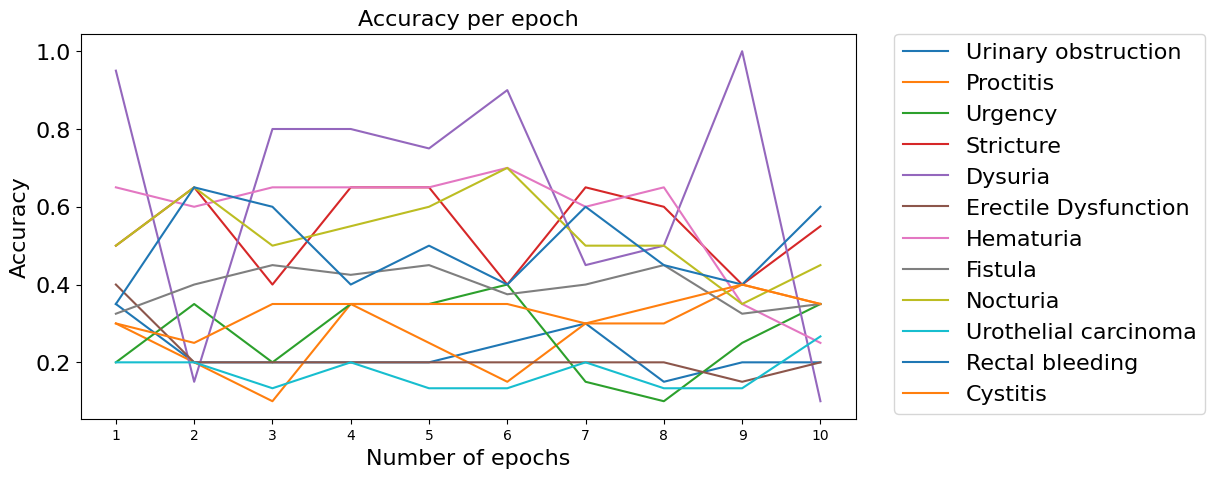

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#draw a line chart where the x-axis is the number of epochs and the y-axis is the accuracy. each line is a different toxicity
for toxicity in toxicity_acc:
    plt.plot(np.arange(1, 11), toxicity_acc[toxicity], label=toxicity)
plt.xlabel('Number of epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(fontsize=16)  # Enlarge tick label font size
plt.title('Accuracy per epoch', fontsize=16)
plt.gcf().set_size_inches(10, 5)
#show the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.show()

In [50]:
# calculate the average and std of the accuracy per epoch
toxicity_acc_np = np.array(list(toxicity_acc.values()))
avg_acc = np.mean(toxicity_acc_np, axis=0)
std_acc = np.std(toxicity_acc_np, axis=0)
#calculate the min and max accuracy per epoch
min_acc = np.min(toxicity_acc_np, axis=0)
max_acc = np.max(toxicity_acc_np, axis=0)
print('toxicity_acc_np.shape:', toxicity_acc_np.shape)
print('avg_acc.shape:', avg_acc.shape)
print('std_acc.shape:', std_acc.shape)
print('min_acc.shape:', min_acc.shape)
print('max_acc.shape:', max_acc.shape)

toxicity_acc_np.shape: (12, 10)
avg_acc.shape: (10,)
std_acc.shape: (10,)
min_acc.shape: (10,)
max_acc.shape: (10,)


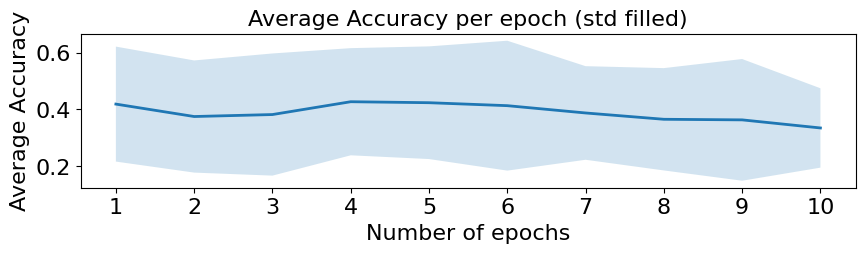

In [51]:
# plot the average and std accuracy per epoch
plt.plot(np.arange(1, 11), avg_acc, linewidth=2)  # Enlarge line width
plt.fill_between(np.arange(1, 11), avg_acc - std_acc, avg_acc + std_acc, alpha=0.2)
plt.xlabel('Number of epochs', fontsize=16)  # Enlarge font size
plt.ylabel('Average Accuracy', fontsize=16)  # Enlarge font size
plt.xticks(np.arange(1, 11, 1), fontsize=16)  # Enlarge tick label font size
plt.yticks(fontsize=16)  # Enlarge tick label font size
plt.title('Average Accuracy per epoch (std filled)', fontsize=16)  # Enlarge font size
plt.gcf().set_size_inches(10, 2)  # Set the figure size
plt.show()

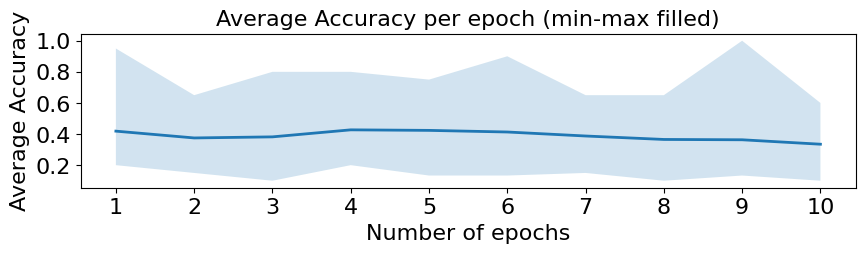

In [52]:
# plot the average and min-max accuracy per epoch
plt.plot(np.arange(1, 11), avg_acc, linewidth=2)  # Enlarge line width
plt.fill_between(np.arange(1, 11), min_acc, max_acc, alpha=0.2)
plt.xlabel('Number of epochs', fontsize=16)  # Enlarge font size
plt.ylabel('Average Accuracy', fontsize=16)  # Enlarge font size
plt.xticks(np.arange(1, 11, 1), fontsize=16)  # Enlarge tick label font size
plt.yticks(fontsize=16)  # Enlarge tick label font size
plt.title('Average Accuracy per epoch (min-max filled)', fontsize=16)  # Enlarge font size
plt.gcf().set_size_inches(10, 2)  # Set the figure size
plt.show()